In [1]:
import os
import sys 
import pandas as pd
from train_models import train_dl_model, LOOK_BACK, PREDICT_N

sys.path.append('../')
from lstm import apply_model

2024-01-20 11:52:33.326516: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-20 11:52:33.347182: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-20 11:52:33.347204: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-20 11:52:33.347997: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-20 11:52:33.351838: I tensorflow/core/platform/cpu_feature_guar

2024-01-20 11:52:37.191795: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-20 11:52:37.191935: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-20 11:52:37.192036: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Compilation Time :  0.004125118255615234
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 12, 22)]          0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 12, 16)            4992      
 onal)                                                           
                                                                 
 dropout_1 (Dropout)         (None, 12, 16)            0         
                                                                 
 lstm_1 (LSTM)               (None, 12, 16)            2112      
                                                                 
 dropout_2 (Dropout)         (None, 12, 16)            0         
                                                                 
 lstm_2 (LSTM)               (None, 16)                2112      
                    

/home/fccoelho/Documentos/Projects_Software/transfer-learning-forecast/preprocessing.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  factor = max_features[target_col]
2024-01-20 11:52:40.125703: I external/local_xla/xla/service/service.cc:168] XLA service 0x7fdfe80014a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-01-20 11:52:40.125724: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2024-01-20 11:52:41.062439: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
I0000 00:00:1705762361.092976 1821814 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
2024-01-20 11:52:41.

225/225 [==============================] - 5s 7ms/step - loss: 0.0404 - accuracy: 0.1511 - mape: 94.6745 - mse: 0.0558 - val_loss: 0.0289 - val_accuracy: 0.0933 - val_mape: 164.9441 - val_mse: 0.0378
Epoch 2/200
225/225 [==============================] - 1s 3ms/step - loss: 0.0328 - accuracy: 0.1200 - mape: 261.4172 - mse: 0.0455 - val_loss: 0.0270 - val_accuracy: 0.0933 - val_mape: 234.6883 - val_mse: 0.0351
Epoch 3/200
225/225 [==============================] - 1s 3ms/step - loss: 0.0308 - accuracy: 0.1467 - mape: 262.2562 - mse: 0.0429 - val_loss: 0.0252 - val_accuracy: 0.0533 - val_mape: 249.0128 - val_mse: 0.0326
Epoch 4/200
225/225 [==============================] - 1s 3ms/step - loss: 0.0292 - accuracy: 0.1333 - mape: 245.5765 - mse: 0.0408 - val_loss: 0.0230 - val_accuracy: 0.0667 - val_mape: 233.0436 - val_mse: 0.0294
Epoch 5/200
225/225 [==============================] - 1s 3ms/step - loss: 0.0268 - accuracy: 0.1467 - mape: 219.7022 - mse: 0.0372 - val_loss: 0.0225 - val_accu

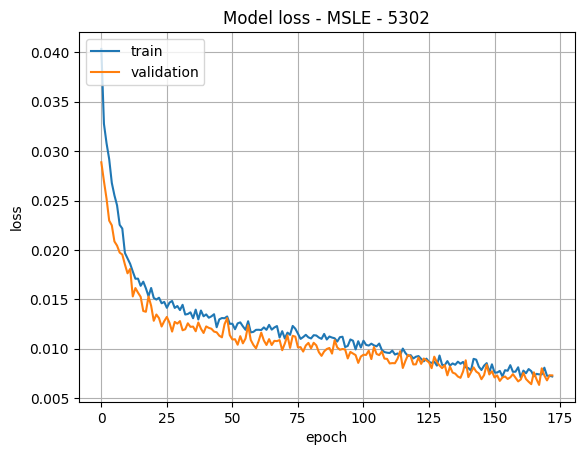

CPU times: user 2min 12s, sys: 7.34 s, total: 2min 19s
Wall time: 1min 45s


In [2]:
%%time 

city = '5302'

FILENAME_DATA = f'../data/dengue_{city}.csv' 

end_date = '2023-12-31'

train_dl_model(city, doenca = 'dengue', end_date_train = None, ratio = 0.75 , end_date = end_date, plot = True, filename_data = FILENAME_DATA, min_delta = 0.001, label = 't1', lr = 0.0001, epochs = 200)
    


/home/fccoelho/Documentos/Projects_Software/transfer-learning-forecast/preprocessing.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  factor = max_features[target_col]


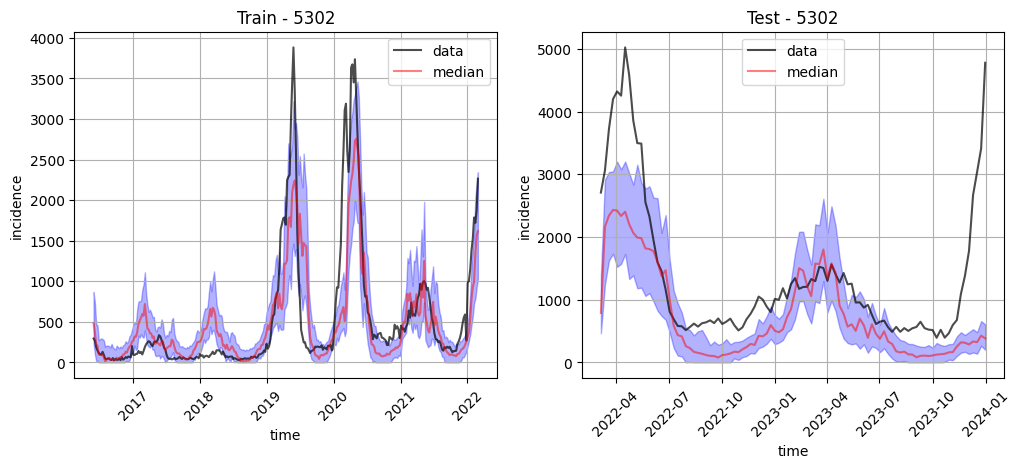

CPU times: user 51.5 s, sys: 2.45 s, total: 53.9 s
Wall time: 44.4 s


In [4]:
%%time 

metrics = apply_model(city, ini_date = '2016-01-01', 
                    end_date = end_date, look_back = LOOK_BACK, end_train_date = None, batch_size = 1, 
                    predict_n = PREDICT_N,  ratio = 0.75,
                    label_pred= f'dengue_{city}',
                    model_name = f'trained_{city}_dengue_t1', 
                    filename = f'../data/dengue_{city}.csv', plot = True)

In [5]:
metrics

,0,1,2,3,4,5,6,7,8,9
mean_absolute_error,7.193643e+02,6.944659e+02,6.964074e+02,7.393583e+02,7.974047e+02,8.621407e+02,9.447969e+02,1.018892e+03,1.115400e+03,1.256092e+03
explained_variance_score,8.814061e-01,8.840241e-01,8.895744e-01,8.871167e-01,8.853814e-01,8.755824e-01,8.604931e-01,8.499018e-01,8.356003e-01,7.901702e-01
mean_squared_error,3.756107e+06,3.687117e+06,3.513874e+06,3.612530e+06,3.671748e+06,3.993013e+06,4.480498e+06,4.776736e+06,5.212155e+06,6.643808e+06
mean_squared_log_error,9.834680e+00,9.416401e+00,9.321984e+00,9.100879e+00,1.145180e+01,1.309190e+01,1.335436e+01,1.397853e+01,1.255331e+01,1.074226e+01
median_absolute_error,2.265000e+02,2.241904e+02,2.127512e+02,2.251359e+02,2.550000e+02,2.720000e+02,2.860000e+02,3.015000e+02,3.280000e+02,3.985000e+02
r2_score,8.813850e-01,8.835471e-01,8.889476e-01,8.857903e-01,8.838979e-01,8.737111e-01,8.582720e-01,8.489061e-01,8.351581e-01,7.899212e-01
